Exam for Machine Learning Python Lab
Consider the file income.csv, explore the data, drop the columns that you consider useless for the classification and find the best classification scheme.
The solution must be produced as a Python Notebook, assuming that the dataset is in the same folder as the notebook.
The notebook must include appropriate comments and must operate as follows:

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots . . . . . . . . . . . . . . . . . . . . . . . . 2pt


In [29]:
import pandas as pd

lines = open("ML-Python-Lab-Data-Names.txt").readlines()
headers = []
for line in lines:
    line = line.replace("\n", "")
    headers.append(line)

df = pd.read_csv("ML-Python-Lab-Data.csv", names=headers)

In [30]:
print("Shapes:", df.shape)
print("Null rows:", df.shape[0] - df.dropna().shape[0])
print("Duplicated rows:", df.shape[0] - df.duplicated().shape[0])
display(df.head())
display(df.describe())
display(df.info())

Shapes: (4177, 10)
Null rows: 1125
Duplicated rows: 0


,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,2088.000000,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,1205.940366,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          3997 non-null   float64
 3   Diameter        3976 non-null   float64
 4   Height          3987 non-null   float64
 5   Whole weight    3990 non-null   float64
 6   Shucked weight  3983 non-null   float64
 7   Viscera weight  4002 non-null   float64
 8   Shell weight    3990 non-null   float64
 9   Rings           4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


None

In [31]:
for col in df.columns:
    print(
        "# Null in column {}:".format(col), df[col].shape[0] - df[col].dropna().shape[0]
    )

# Null in column Index: 0
# Null in column Sex: 0
# Null in column Length: 180
# Null in column Diameter: 201
# Null in column Height: 190
# Null in column Whole weight: 187
# Null in column Shucked weight: 194
# Null in column Viscera weight: 175
# Null in column Shell weight: 187
# Null in column Rings: 0


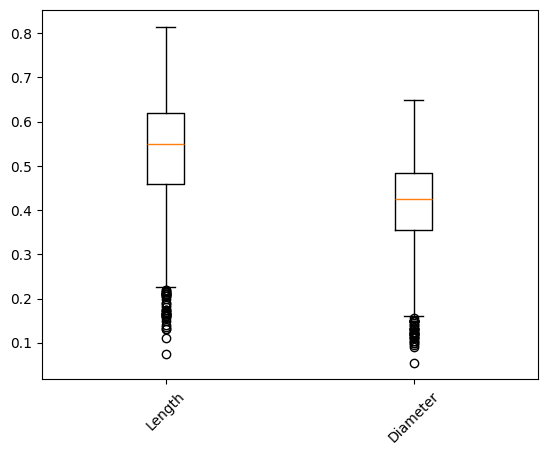

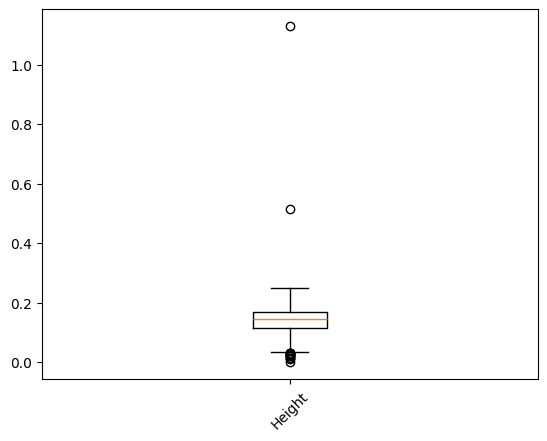

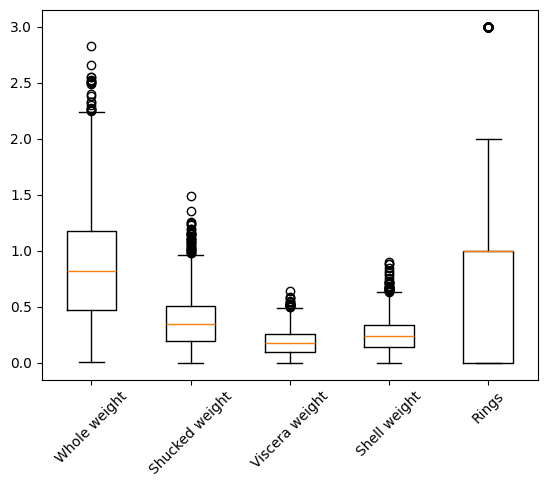

In [32]:
import matplotlib.pyplot as plt

plt.style.use("default")

df_plot = df.drop(["Index", "Sex"], axis=1).dropna()

df_plot1 = df_plot.iloc[:, 0:2]
df_plot3 = df_plot.iloc[:, [2]]
df_plot2 = df_plot.iloc[:, 3:8]

plt.boxplot(df_plot1, labels=df_plot1.columns)
plt.xticks(rotation=45)
plt.show()

plt.boxplot(df_plot3, labels=df_plot3.columns)
plt.xticks(rotation=45)
plt.show()

plt.boxplot(df_plot2, labels=df_plot2.columns)
plt.xticks(rotation=45)
plt.show()

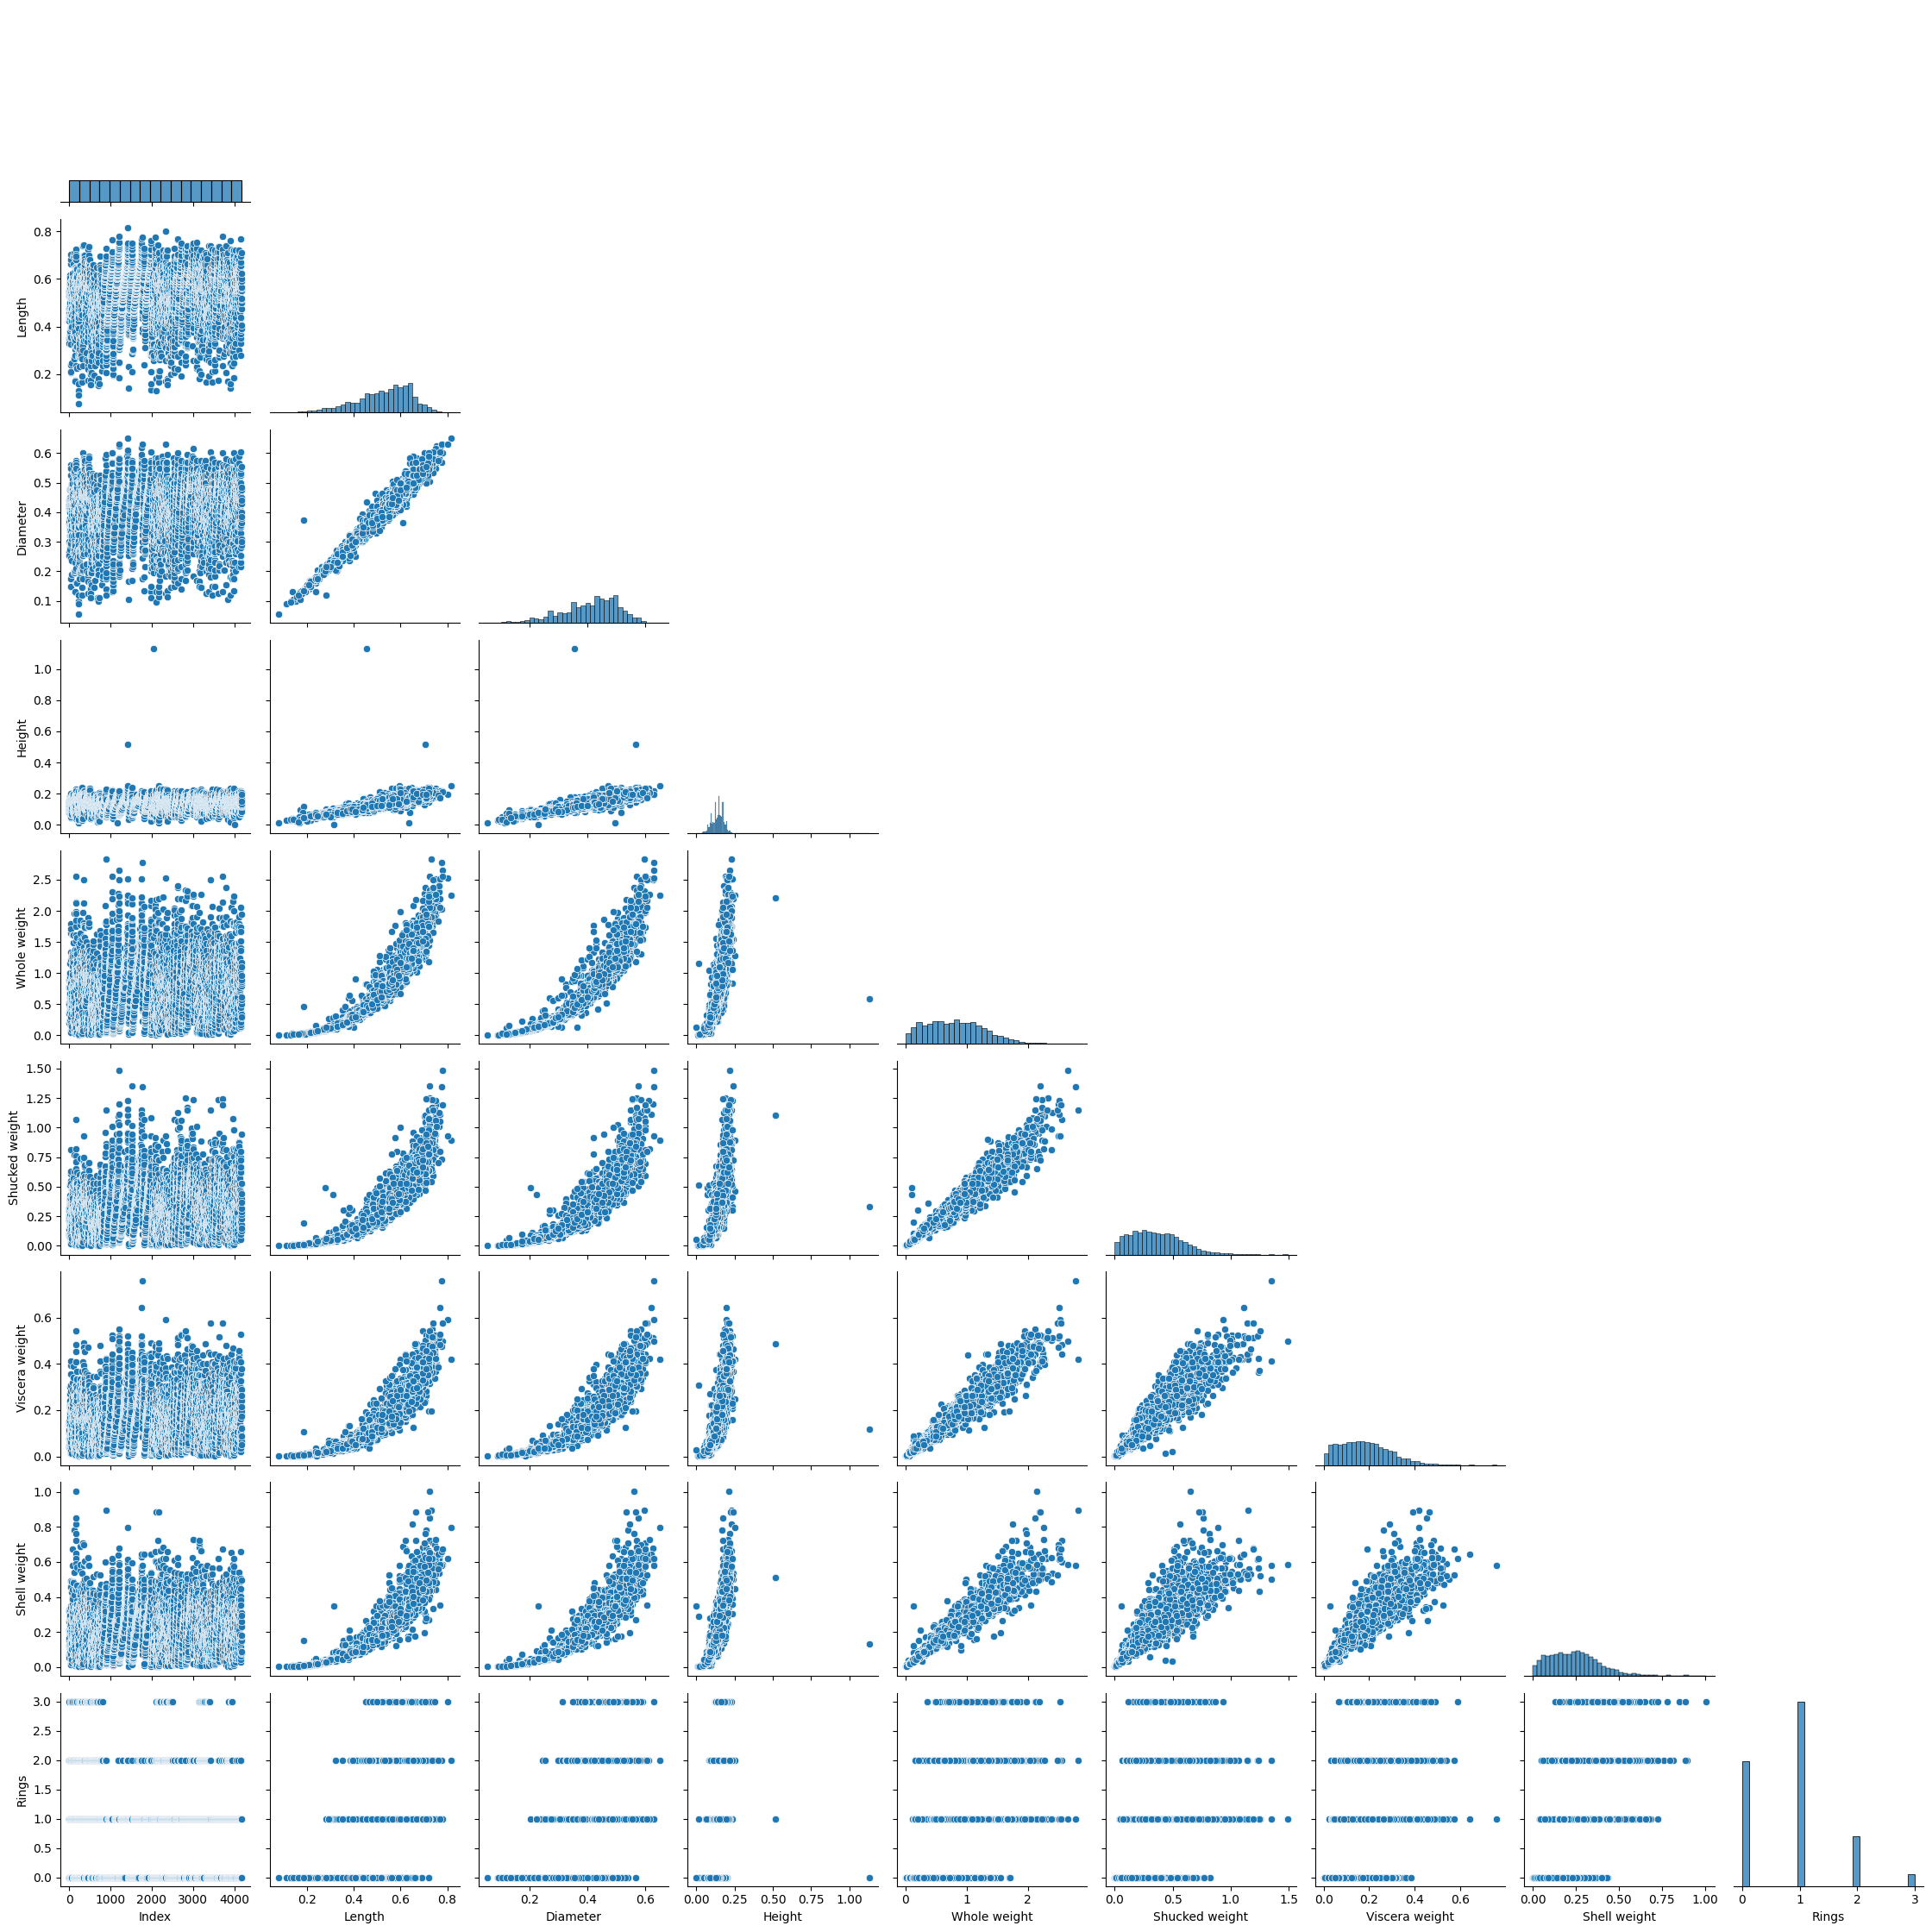

In [33]:
import seaborn as sns

sns.pairplot(df, corner=True)
plt.tight_layout()


2. Comment the exploration of step 1 pointing out if there are imbalanced
distributions, outliers, missing values . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt


- The number of samples with feature "Rings" equals to "3" is very low in comparison with the others.
- The distribution of feature "Sex" is instead balanced.
- There is a non negligible number of missing values. The only columns that are complete are Sex and Rings (and Index obviously)
- All features have approximately a normal distribution
- There are some outliers for the columns of weight on the upper values
- Feature Height has a couple of outliers


3. Drop the columns that are not relevant for the classification operation,
if any, and explain why you do that.
Deal with missing values, if any . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt


In [34]:
# drop the index column because it's not useful
df.drop("Index", axis=1, inplace=True)
df.corr()

ValueError: could not convert string to float: 'M'


4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure . . . . . . . . . . . . . . . . . . .4pt



5. Show the performance measures and the confusion matrices for the best
hyperparameters of each model . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt



6. Comment the results . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
